# Exploratory Data Analysis

In [1]:
import pandas as pd
import seaborn as sns
sns.set_theme(palette= "colorblind")

In [2]:
arabica_data_url = 'https://raw.githubusercontent.com/jldbc/coffee-quality-database/master/data/arabica_data_cleaned.csv'

coffee_df = pd.read_csv(arabica_data_url)

Which of the following scores is distributed most similarly to Sweetness?

In [3]:
scores_of_interest = ['Flavor','Balance','Aroma','Body',
                      'Uniformity','Aftertaste','Sweetness']

First step is to subset the data:

In [4]:
coffee_df[scores_of_interest].head(2)

,Flavor,Balance,Aroma,Body,Uniformity,Aftertaste,Sweetness
0,8.83,8.42,8.67,8.50,10.0,8.67,10.0
1,8.67,8.42,8.75,8.42,10.0,8.50,10.0


Then we produce a kde plot

<AxesSubplot:ylabel='Density'>

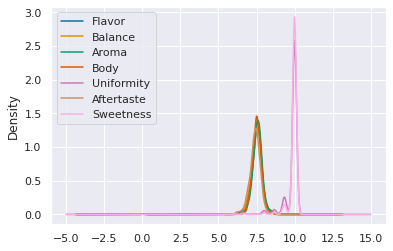

In [5]:
coffee_df[scores_of_interest].plot(kind='kde')

We could also do it with seaborn

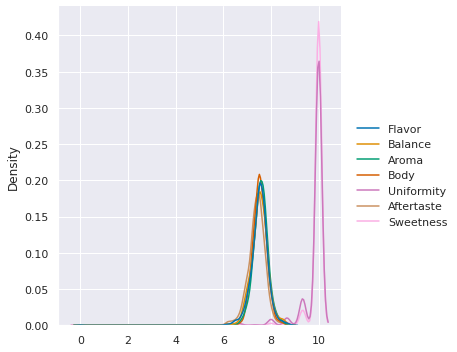

In [6]:
sns.displot(data=coffee_df[scores_of_interest],kind='kde')

If we forget the parameter `kind`, we get its default value,
which is histogram
````{margin}
```{note}
If you show this excerpt, you'll see how I was able to select only a subset of the docstring to display in the notebook, programmatically. You're not required to know how to do it, but if you're curious, you can see.
```
````

In [7]:
print('\n'.join(sns.displot.__doc__.split('\n')[5:10]))

``kind`` parameter selects the approach to use:

- :func:`histplot` (with ``kind="hist"``; the default)
- :func:`kdeplot` (with ``kind="kde"``)
- :func:`ecdfplot` (with ``kind="ecdf"``; univariate-only)


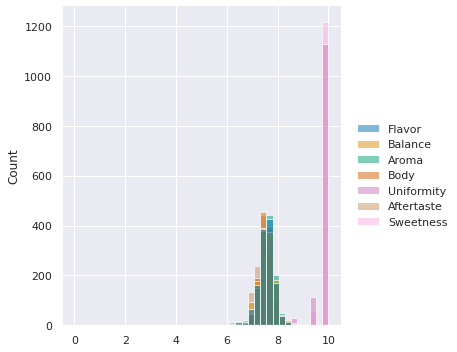

In [8]:
sns.displot(data=coffee_df[scores_of_interest])

## Summarizing with two variables

So, we can summarize data now, but the summaries we have done so far have treated each variable one at a time.  The most interesting patterns are in often in how multiple variables interact. We'll do some modeling that looks at multivariate functions of data in a few weeks, but for now, we do a little more with summary statistics.

On Monday, we saw how to see how many reviews there were per country, using `value_counts()` on the `Country.of.Origin` column.

In [9]:
coffee_df['Country.of.Origin'].value_counts().head(2)

Mexico      236
Colombia    183
Name: Country.of.Origin, dtype: int64

The data also has `Number.of.Bags` however.  How can we check which has the most bags?

We can do this with groupby.

In [10]:
coffee_df.groupby('Country.of.Origin')['Number.of.Bags'].sum()

Country.of.Origin
Brazil                          30534
Burundi                           520
China                              55
Colombia                        41204
Costa Rica                      10354
Cote d?Ivoire                       2
Ecuador                             1
El Salvador                      4449
Ethiopia                        11761
Guatemala                       36868
Haiti                             390
Honduras                        13167
India                              20
Indonesia                        1658
Japan                              20
Kenya                            3971
Laos                               81
Malawi                            557
Mauritius                           1
Mexico                          24140
Myanmar                            10
Nicaragua                        6406
Panama                            537
Papua New Guinea                    7
Peru                             2336
Philippines                     

What just happened?
![split-apply-combine image showing one data table, it split into 3 part, the sum applied to each part, and the sums combined back into one table](https://jakevdp.github.io/PythonDataScienceHandbook/figures/03.08-split-apply-combine.png)

Groupby splits the whole dataframe into parts where each part has the same value for `Country.of.Origin` and then after that, we extracted the `Number.of.Bags` column, took the sum (within each separate group) and then put it all back together in one table (in this case, a `Series` becuase we picked one variable out)

## How doe Groupby Work?

We can view this by saving the groupby object as a variable and exploring it.

In [11]:
country_grouped = coffee_df.groupby('Country.of.Origin')

country_grouped

Trying to look at it without applying additional functions, just tells us the type.  But, it's iterable, so we can loop over.

In [12]:
for country,df in country_grouped:
    print(type(country), type(df))

<class 'str'> <class 'pandas.core.frame.DataFrame'>
<class 'str'> <class 'pandas.core.frame.DataFrame'>
<class 'str'> <class 'pandas.core.frame.DataFrame'>
<class 'str'> <class 'pandas.core.frame.DataFrame'>
<class 'str'> <class 'pandas.core.frame.DataFrame'>
<class 'str'> <class 'pandas.core.frame.DataFrame'>
<class 'str'> <class 'pandas.core.frame.DataFrame'>
<class 'str'> <class 'pandas.core.frame.DataFrame'>
<class 'str'> <class 'pandas.core.frame.DataFrame'>
<class 'str'> <class 'pandas.core.frame.DataFrame'>
<class 'str'> <class 'pandas.core.frame.DataFrame'>
<class 'str'> <class 'pandas.core.frame.DataFrame'>
<class 'str'> <class 'pandas.core.frame.DataFrame'>
<class 'str'> <class 'pandas.core.frame.DataFrame'>
<class 'str'> <class 'pandas.core.frame.DataFrame'>
<class 'str'> <class 'pandas.core.frame.DataFrame'>
<class 'str'> <class 'pandas.core.frame.DataFrame'>
<class 'str'> <class 'pandas.core.frame.DataFrame'>
<class 'str'> <class 'pandas.core.frame.DataFrame'>
<class 'str'

````{margin}
```{note}
I used this feature to build the separate view of the communication channels on this website.  You can view that source using the github icon on that page.
```
````

We could manually compute things using the data structure, if needed, though using pandas functionality will usually do what we want. For example:

````{margin}
```{note}
I tried putting this dictionary into the dataframe for display purposes using the regular constructor and got an error, so I googled about making one from a dictionary to get the docs, which is how I learned about the [`from_dict`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.from_dict.html) method and its `orient` parameter which solved my problems.
```
````

In [13]:
bag_total_dict = {}

for country,df in country_grouped:
    tot_bags =  df['Number.of.Bags'].sum()
    bag_total_dict[country] = tot_bags

pd.DataFrame.from_dict(bag_total_dict, orient='index',
                           columns = ['Number.of.Bags.Sum'])

,Number.of.Bags.Sum
Brazil,30534
Burundi,520
China,55
Colombia,41204
Costa Rica,10354
Cote d?Ivoire,2
Ecuador,1
El Salvador,4449
Ethiopia,11761
Guatemala,36868


is the same as what we did before

```{admonition} Question from class
How can we sort it?
```

First, we'll make it a variable to keep the code legible, then we'll use `sort_values()`

In [14]:
bag_total_df = coffee_df.groupby('Country.of.Origin')['Number.of.Bags'].sum()
bag_total_df.sort_values()

Country.of.Origin
Mauritius                           1
Ecuador                             1
Cote d?Ivoire                       2
Papua New Guinea                    7
Vietnam                            10
Myanmar                            10
Zambia                             13
India                              20
Japan                              20
China                              55
United States (Puerto Rico)        71
Laos                               81
Rwanda                            150
Philippines                       259
United States                     361
Haiti                             390
Burundi                           520
Panama                            537
Malawi                            557
United States (Hawaii)            833
Thailand                         1310
Indonesia                        1658
Taiwan                           1914
Peru                             2336
Tanzania, United Republic Of     3760
Uganda                          

Which, by default uses ascending order, the method has an `ascending` parameter and its default value is `True`, so we can switch it to `False` to get descending

In [15]:
bag_total_df.sort_values(ascending=False,)

Country.of.Origin
Colombia                        41204
Guatemala                       36868
Brazil                          30534
Mexico                          24140
Honduras                        13167
Ethiopia                        11761
Costa Rica                      10354
Nicaragua                        6406
El Salvador                      4449
Kenya                            3971
Uganda                           3868
Tanzania, United Republic Of     3760
Peru                             2336
Taiwan                           1914
Indonesia                        1658
Thailand                         1310
United States (Hawaii)            833
Malawi                            557
Panama                            537
Burundi                           520
Haiti                             390
United States                     361
Philippines                       259
Rwanda                            150
Laos                               81
United States (Puerto Rico)     

## Customizing Data Summaries

We've looked at an overall summary with `describe` on all the variables,  describe on one variable, individual statistics on all variables, and individual statistics on one variable.  We can also build  summaries of multiple varialbes with a custom subset of summary statistics, with `aggregate` or using its alias `agg`

`````{margin}

```{admonition} Learning Tip
When a person reads a line of code, they have to use their working memory to hold the whole thing in order to make sense of it. Human working memory only holds 5-9 things at a time, that's why a phone number is 7 digits without the area code, (when people used to have to actually dial the digits, they also didn't need the area codes for short-distance calls, which were most of the calls).   

How many concepts does a person have to hold in working memory at once to parse the second version?

If you are writing the code, and building it up, you hold the previous pieces in your memory differently than a person coming to it for the first time.
```
`````

In [16]:
country_grouped.agg({'Number.of.Bags':'sum',
                     'Balance':['mean','count'],})

Number.of.Bags   Balance      
                                        sum      mean count
Country.of.Origin                                          
Brazil                                30534  7.531515   132
Burundi                                 520  7.415000     2
China                                    55  7.548125    16
Colombia                              41204  7.708415   183
Costa Rica                            10354  7.637255    51
Cote d?Ivoire                             2  7.080000     1
Ecuador                                   1  7.830000     1
El Salvador                            4449  7.711429    21
Ethiopia                              11761  7.972273    44
Guatemala                             36868  7.469890   181
Haiti                                   390  7.056667     6
Honduras                              13167  7.163962    53
India                                    20  7.420000     1
Indonesia                              1658  7.520000    20
Japan                                    20  7.830000     1
Kenya                                  3971  7.800400    25
Laos                                     81  7.416667     3
Malawi                                  557  7.371818    11
Mauritius                                 1  7.170000     1
Mexico                                24140  7.328686   236
Myanmar                                  10  7.133750     8
Nicaragua                              6406  7.278462    26
Panama                                  537  7.875000     4
Papua New Guinea                          7  8.250000     1
Peru                                   2336  7.666000    10
Philippines                             259  7.400000     5
Rwanda                                  150  7.750000     1
Taiwan                                 1914  7.426000    75
Tanzania, United Republic Of           3760  7.469750    40
Thailand                               1310  7.524063    32
Uganda                                 3868  7.660769    26
United States                           361  7.947500     8
United States (Hawaii)                  833  7.644110    73
United States (Puerto Rico)              71  7.647500     4
Vietnam                                  10  7.547143     7
Zambia                                   13  7.420000     1

We could also string this together, but splitting into interim variables makes code more readable. Shorter lines are easier to read (and sometimes auto-enforced on projects). Also, by giving a good variable name to the interim states we get more description, which can help a human better read it.

In [17]:
coffee_df.groupby('Country.of.Origin').agg({'Number.of.Bags':'sum','Balance':['mean','count'],})

Number.of.Bags   Balance      
                                        sum      mean count
Country.of.Origin                                          
Brazil                                30534  7.531515   132
Burundi                                 520  7.415000     2
China                                    55  7.548125    16
Colombia                              41204  7.708415   183
Costa Rica                            10354  7.637255    51
Cote d?Ivoire                             2  7.080000     1
Ecuador                                   1  7.830000     1
El Salvador                            4449  7.711429    21
Ethiopia                              11761  7.972273    44
Guatemala                             36868  7.469890   181
Haiti                                   390  7.056667     6
Honduras                              13167  7.163962    53
India                                    20  7.420000     1
Indonesia                              1658  7.520000    20
Japan                                    20  7.830000     1
Kenya                                  3971  7.800400    25
Laos                                     81  7.416667     3
Malawi                                  557  7.371818    11
Mauritius                                 1  7.170000     1
Mexico                                24140  7.328686   236
Myanmar                                  10  7.133750     8
Nicaragua                              6406  7.278462    26
Panama                                  537  7.875000     4
Papua New Guinea                          7  8.250000     1
Peru                                   2336  7.666000    10
Philippines                             259  7.400000     5
Rwanda                                  150  7.750000     1
Taiwan                                 1914  7.426000    75
Tanzania, United Republic Of           3760  7.469750    40
Thailand                               1310  7.524063    32
Uganda                                 3868  7.660769    26
United States                           361  7.947500     8
United States (Hawaii)                  833  7.644110    73
United States (Puerto Rico)              71  7.647500     4
Vietnam                                  10  7.547143     7
Zambia                                   13  7.420000     1

```{admonition} Question from Class
What does the `count` do? or how can we figure it out?
```


```{adomonition} Learning Tip
To see what a method does, reading the documentation for a method should generally be your first stop. Testing it yourself is best for when you are trying to see how two methods are different. Once you're testing, one way is to apply it to a small dataset. In fact, a lot of the pandas documentation illustrates how methods work on tiny dataframes.
```

In this case, let's compare `count` to `shape` we know that shape returns the number of rows and columns. Also `shape` is an attribute, not a method (so no `()` for shape). However, there's a more important difference.

In [18]:
coffee_df['Balance','Farm.Name','Lot.Number'].shape

KeyError: ('Balance', 'Farm.Name', 'Lot.Number')

In [19]:
coffee_df['Balance','Farm.Name','Lot.Number'].count()

KeyError: ('Balance', 'Farm.Name', 'Lot.Number')

Here we get different number for `Balance` and `Farm Name`
The shape tells us how many rows there are, while count tells us how many are not null.

We can verify visually that some are null with:

In [20]:
coffee_df.head()

,Unnamed: 0,Species,Owner,Country.of.Origin,Farm.Name,Lot.Number,Mill,ICO.Number,Company,Altitude,...,Color,Category.Two.Defects,Expiration,Certification.Body,Certification.Address,Certification.Contact,unit_of_measurement,altitude_low_meters,altitude_high_meters,altitude_mean_meters
0,1,Arabica,metad plc,Ethiopia,metad plc,NaN,metad plc,2014/2015,metad agricultural developmet plc,1950-2200,...,Green,0,"April 3rd, 2016",METAD Agricultural Development plc,309fcf77415a3661ae83e027f7e5f05dad786e44,19fef5a731de2db57d16da10287413f5f99bc2dd,m,1950.0,2200.0,2075.0
1,2,Arabica,metad plc,Ethiopia,metad plc,NaN,metad plc,2014/2015,metad agricultural developmet plc,1950-2200,...,Green,1,"April 3rd, 2016",METAD Agricultural Development plc,309fcf77415a3661ae83e027f7e5f05dad786e44,19fef5a731de2db57d16da10287413f5f99bc2dd,m,1950.0,2200.0,2075.0
2,3,Arabica,grounds for health admin,Guatemala,"san marcos barrancas ""san cristobal cuch",NaN,NaN,NaN,NaN,1600 - 1800 m,...,NaN,0,"May 31st, 2011",Specialty Coffee Association,36d0d00a3724338ba7937c52a378d085f2172daa,0878a7d4b9d35ddbf0fe2ce69a2062cceb45a660,m,1600.0,1800.0,1700.0
3,4,Arabica,yidnekachew dabessa,Ethiopia,yidnekachew dabessa coffee plantation,NaN,wolensu,NaN,yidnekachew debessa coffee plantation,1800-2200,...,Green,2,"March 25th, 2016",METAD Agricultural Development plc,309fcf77415a3661ae83e027f7e5f05dad786e44,19fef5a731de2db57d16da10287413f5f99bc2dd,m,1800.0,2200.0,2000.0
4,5,Arabica,metad plc,Ethiopia,metad plc,NaN,metad plc,2014/2015,metad agricultural developmet plc,1950-2200,...,Green,2,"April 3rd, 2016",METAD Agricultural Development plc,309fcf77415a3661ae83e027f7e5f05dad786e44,19fef5a731de2db57d16da10287413f5f99bc2dd,m,1950.0,2200.0,2075.0


```{admonition} Correction
This response is slightly corrected from what I said in class, because in the balance column, it does match, but in general it doesn't. `count` on grouped will only be the same as `value_count` when `count` is applied to a column that does not have any missing values where the grouping variable has a value.
```

On the balance column alone in class, we checked that the grouped count matched the country value counts.

In [21]:
country_grouped[['Balance','Farm.Name','Lot.Number']].count().sort_values(by='Balance'
    ascending=False)

SyntaxError: invalid syntax (3556086896.py, line 2)

In [22]:
coffee_df['Country.of.Origin'].value_counts()

Mexico                          236
Colombia                        183
Guatemala                       181
Brazil                          132
Taiwan                           75
United States (Hawaii)           73
Honduras                         53
Costa Rica                       51
Ethiopia                         44
Tanzania, United Republic Of     40
Thailand                         32
Uganda                           26
Nicaragua                        26
Kenya                            25
El Salvador                      21
Indonesia                        20
China                            16
Malawi                           11
Peru                             10
United States                     8
Myanmar                           8
Vietnam                           7
Haiti                             6
Philippines                       5
Panama                            4
United States (Puerto Rico)       4
Laos                              3
Burundi                     

In class, they were the same, because `Balance` doesn't have missing values. `Farm.Name` and `Lot.Number` havea lot of missing values, so they're different numbers.


Another function we could use when we first examine a dataset is `info` this tells us about the NaN values up front.

In [23]:
coffee_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1311 entries, 0 to 1310
Data columns (total 44 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             1311 non-null   int64  
 1   Species                1311 non-null   object 
 2   Owner                  1304 non-null   object 
 3   Country.of.Origin      1310 non-null   object 
 4   Farm.Name              955 non-null    object 
 5   Lot.Number             270 non-null    object 
 6   Mill                   1001 non-null   object 
 7   ICO.Number             1165 non-null   object 
 8   Company                1102 non-null   object 
 9   Altitude               1088 non-null   object 
 10  Region                 1254 non-null   object 
 11  Producer               1081 non-null   object 
 12  Number.of.Bags         1311 non-null   int64  
 13  Bag.Weight             1311 non-null   object 
 14  In.Country.Partner     1311 non-null   object 
 15  Harv

## Using summaries for visualization

```{important}
This section is an extension, that we didn't get to in class, but might help in your assignment
```

For example, we can group by color and take the mean of each of the scores from the beginning of class and then use a bar chart.

<AxesSubplot:xlabel='Color'>

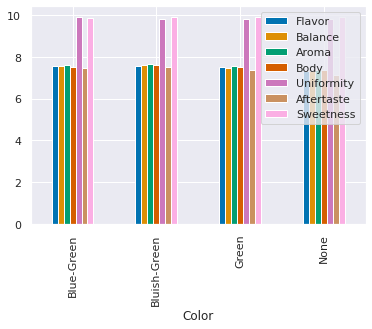

In [24]:
color_grouped = coffee_df.groupby('Color')[scores_of_interest].mean()
color_grouped.plot(kind='bar')

## Questions after class

```{admonition} Ram Token Opportunity
add a question with a pull request; earn 1-2 ram tokens for submitting a question with the answer (with sources)
```

## More Practice

- Make a table thats total number of bags and mean and count of scored for each of the variables in the `scores_of_interest` list.
- Make a bar chart of the mean score for each variable `scores_of_interest` grouped by country.